## Sampling from a langue model

The following NB demonstrates the sampling from a LLM. We use GTP-2 as an example, which we obtain from Hugging Face.

In [2]:
# We use torch here, but don't worry
import torch
print('torch :', torch.__version__)

torch : 2.1.0+cu121


In [3]:
%pip install transformers #Installing the transformers library from Hugging Face

### The tokenizer translates a string into numbers

In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load pretrained model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
print("Hello world becomes", tokenizer("Hello world")["input_ids"])
# TODO Find the tokens for Your name
# Scroll down for solutions

























tokenizer("Oliver Dürr")["input_ids"] #Split into 5 tokens

Hello world becomes [15496, 995]


[30098, 1428, 360, 9116, 21062]

There is a nice representation for tokens, see https://platform.openai.com/tokenizer. Go there and play around, the tokenizer there might be different to the one for GTP-2

Encoding the input sequence.

In [12]:
# Encode input context
model = AutoModelForCausalLM.from_pretrained(model_name)
input_context = "The weather is really nice today. I'm thinking about going for a"
input_ids = tokenizer.encode(input_context, return_tensors="pt")
print("input_ids ", input_ids)
#tokenizer.decode(input_ids, skip_special_tokens=True) TODO fix

input_ids  tensor([[ 464, 6193,  318, 1107, 3621, 1909,   13,  314, 1101, 3612,  546, 1016,
          329,  257]])


Sampling from the LMM

In [16]:
out_ids = model.generate(input_ids, max_length=50, do_sample=True, temperature=1.0)
print("The sampled output ids", out_ids)
print("Translated back to text", tokenizer.decode(out_ids[0, input_ids.shape[1]:], skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The sampled output ids tensor([[  464,  6193,   318,  1107,  3621,  1909,    13,   314,  1101,  3612,
           546,  1016,   329,   257,  1057,   319,   262,   938,  1110,    11,
           290,   788,  1016,   656,   257,  2151,   284,   766,   661,    13,
           383,   691,  1243,   314,   761,   389,   257,  3024, 13209,    11,
           290,   257, 35685,    11,   290,  3863,   257,  1178,  9155,  5645]])
Translated back to text  run on the last day, and then going into a party to see people. The only things I need are a hot coat, and a sweater, and maybe a few loose ends


Sampling 30 times from the input sequence.

In [ ]:
output_list = []
for i in range(30):
    print(i)
    # Generate next token
    output = model.generate(input_ids, max_length=20, do_sample=True, temperature=1.0)
    # Decode output
    #output_text = tokenizer.decode(output[0], skip_special_tokens=True)
    output_text = tokenizer.decode(output[0, input_ids.shape[1]:], skip_special_tokens=True)
    output_list.append(output_text + "...")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


2


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


3


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


4


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


5


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


6


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


7


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


8


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


9


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


10


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


11


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


12


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


13


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


14


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


15


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


16


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


17


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


18


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


19


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


20


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


21


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


22


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


23


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


24


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


25


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


26


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


27


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


28


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


29


In [ ]:
output_list

[' walk before or after the event...',
 ' swim in the Caribbean next week...',
 ' walk in the woods a few...',
 ' swim in the winter, just...',
 ' ski....',
 ' walk over the mountains with my...',
 ' walk or a weekend hike....',
 ' long walk up the hill to...',
 ' walk in the park at night...',
 ' swim. When I went swimming...',
 ' walk around my apartment, and...',
 ' nice day tomorrow. I will...',
 ' walk down this river the rest...',
 ' hike along Piedmont Road...',
 ' long ride."\n\nHe...',
 ' swim at this time. I...',
 ' little bit of walk. It...',
 ' run or to watch the NFL...',
 ' walk a bit or just stopping...',
 ' ride. Maybe we will have...',
 ' lunch in the bay next week...',
 ' run, maybe a walk,...',
 ' cruise today and seeing how well...',
 ' swim in October, but I...',
 ' walk and driving to the airport...',
 ' night or three with friends and...',
 ' walk before getting a good night...',
 ' break today," she told ABC...',
 ' lunch. I would come home...',
 ' drive to the 

Get the probabilities for the next token.

In [18]:
import pandas as pd
# Get logits of last hidden state
outputs = model(input_ids)
next_token_logits = outputs.logits[:, -1, :]

# Apply softmax to calculate probabilities
probs = torch.nn.functional.softmax(next_token_logits, dim=-1)

#Convert probabilities to pandas DataFrame
probs = probs.detach().numpy().flatten()
tokens = [tokenizer.decode(i) for i in range(len(probs))]

probs_df = pd.DataFrame(list(zip(tokens, probs)), columns=['token', 'probability'])

# Sort by probability and print the 10 most likely next tokens
top_10_tokens = probs_df.sort_values('probability', ascending=False).head(10)
print(top_10_tokens)
#top_10_tokens.to_csv('top_10_tokens.csv', index=False)


         token  probability
2513      walk     0.169731
9422      swim     0.132105
1057       run     0.074474
18390     hike     0.051884
48342      jog     0.040393
3708     drive     0.014346
890       long     0.014179
41360   stroll     0.013317
6594      ride     0.011630
1110       day     0.009953


## You Job: Visualize the output probabilities of the next token

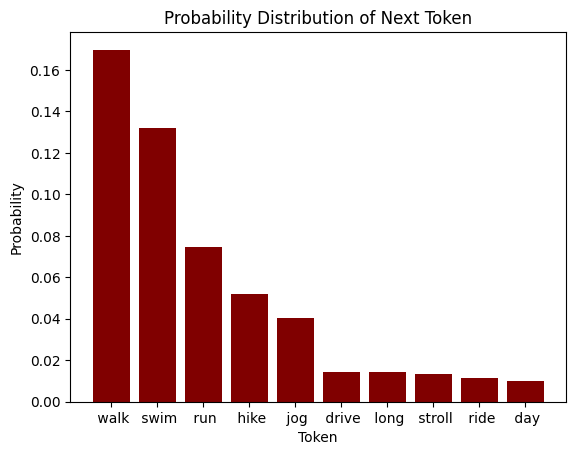

In [19]:
## Try first then scroll down




























import matplotlib.pyplot as plt

plt.bar(top_10_tokens['token'], top_10_tokens['probability'], color ='maroon')
plt.xlabel("Token")
plt.ylabel("Probability")
plt.title("Probability Distribution of Next Token")
plt.show()

## Effect on temperatur on scaling

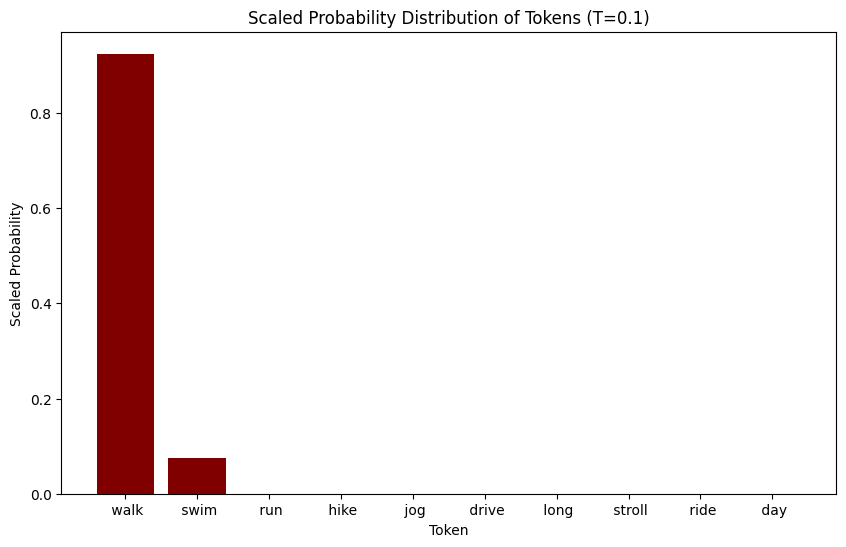

In [21]:
from ipywidgets import interact
import numpy as np
df = top_10_tokens.copy()
# Function to plot
def plot_scaled_prob(T):
    df['scaled_probability'] = df['probability']**(1/T)
    df['scaled_probability'] = df['scaled_probability'] / np.sum(df['scaled_probability'])

    plt.figure(figsize=(10,6))
    plt.bar(df['token'], df['scaled_probability'], color ='maroon')
    plt.xlabel("Token")
    plt.ylabel("Scaled Probability")
    plt.title(f"Scaled Probability Distribution of Tokens (T={round(T, 1)})")
    plt.show()

plot_scaled_prob(0.1)

In [22]:
# Interactive plot
interact(plot_scaled_prob, T=(1e-2, 10.0, 0.1));

interactive(children=(FloatSlider(value=4.91, description='T', max=10.0, min=0.01), Output()), _dom_classes=('…

Below just shows how to create a movie.

In [23]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
from PIL import Image, ImageSequence
# Prepare figure
fig, ax = plt.subplots(figsize=(10,6))

# Animation update function
def update(T):
    ax.clear()
    df['scaled_probability'] = df['probability']**(1/T)
    df['scaled_probability'] = df['scaled_probability'] / np.sum(df['scaled_probability'])
    ax.bar(df['token'], df['scaled_probability'], color ='maroon')
    ax.set_xlabel("Token")
    ax.set_ylabel("Scaled Probability")
    ax.set_title(f"Scaled Probability Distribution of Tokens (T={round(T, 1)})")

# Create animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0.1, 3.0, 30), repeat=True)

# Save animation as GIF
ani.save("animated_plot.gif", writer='imagemagick')